# Overturning

Example code to diagnose overturning in density space from `mom6-panan` simulations.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1','panant-hycom1-v2'] #,'panant-v3'

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41639,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://10.6.46.67:44679,Total threads: 4
Dashboard: /proxy/45621/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:34039,


## Plot overturning over first year for all expts

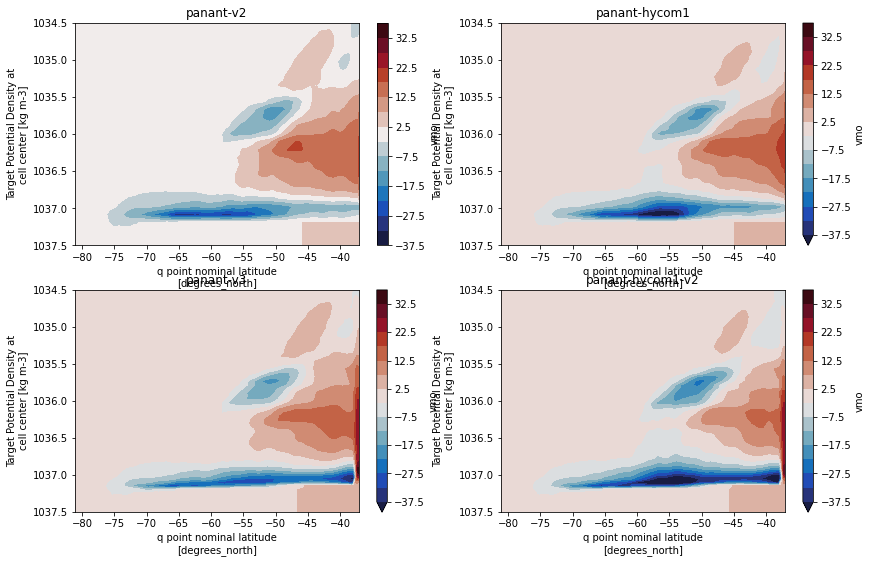

In [13]:
plt.figure(figsize=(14,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':120},decode_times=False)
    vmo_year1 = vmo.isel(time=slice(0,12)).sum('xh').mean('time').load()/1e9
    plt.subplot(2,2,ii)
    vmo_year1.cumsum('rho2_l').plot.contourf(levels=np.arange(-37.5,38,5),cmap=cm.cm.balance)
    plt.ylim([1034.5,1037.5])
    plt.gca().invert_yaxis()
    plt.title(expt)


## Plot overturning over last year of HYCOM1 expt

In [4]:
vmo = cc.querying.getvar('panant-hycom1-v2', 'vmo', session, chunks={'yq':60},decode_times=False)
nt = vmo.time.size

In [5]:
nt

36

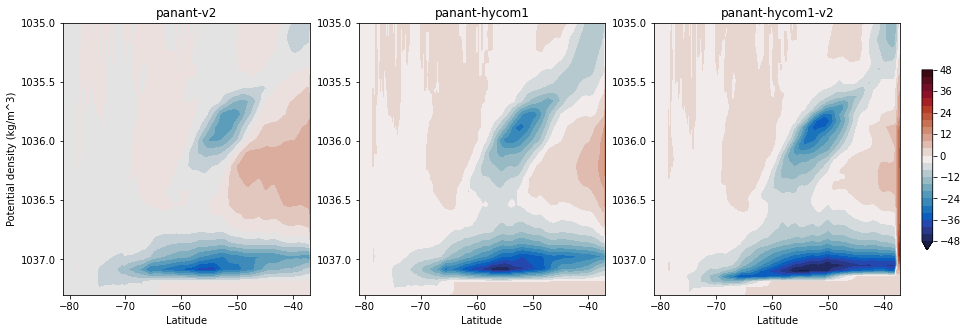

In [11]:
plt.figure(figsize=(15,5))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':120})
    vmo_lastyear = vmo.isel(time=slice(nt-12,nt)).sum('xh').mean('time').load()/1e9
    plt.subplot(1,3,ii)
    p1 = vmo_lastyear.cumsum('rho2_l').plot.contourf(add_colorbar=False,levels=np.arange(-48,49,4),cmap=cm.cm.balance)
    plt.ylim([1035,1037.3])
    #plt.axhline(1037.1,color='y',linestyle='--',linewidth=0.5)
    plt.gca().invert_yaxis()
    plt.title(expt)
    if (ii==1):
        plt.ylabel('Potential density (kg/m^3)')
    else:
        plt.ylabel('')
    plt.xlabel('Latitude')

ax_c = plt.axes([0.92,0.25,0.01,0.5])
plt.colorbar(p1,cax=ax_c)
plt.savefig('figures/overturning.png')

## Plot timeseries of overturning

Look at extrema at several different latitudes

Text(0.5, 1.0, 'Abyssal cell transport - 65°S')

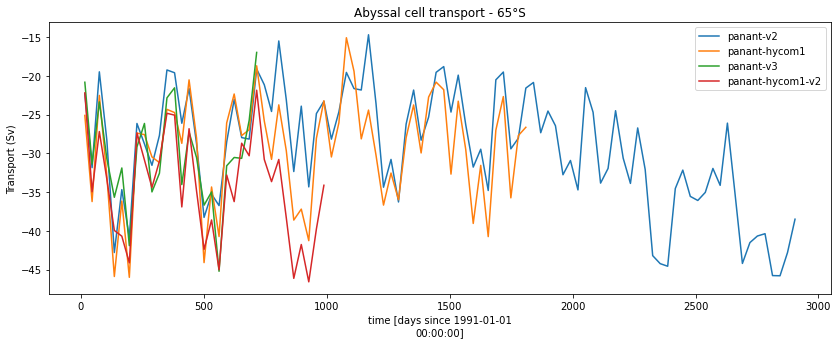

In [7]:
plt.figure(figsize=(14,5))
lat = -65
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Abyssal cell transport - 55°S')

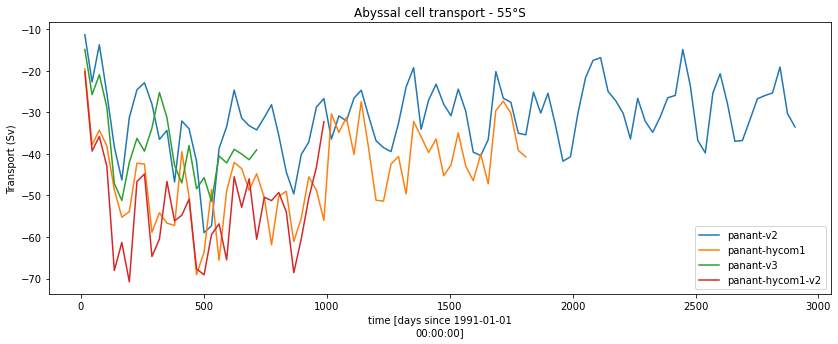

In [8]:
plt.figure(figsize=(14,5))
lat = -55
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Abyssal cell transport - 45°S')

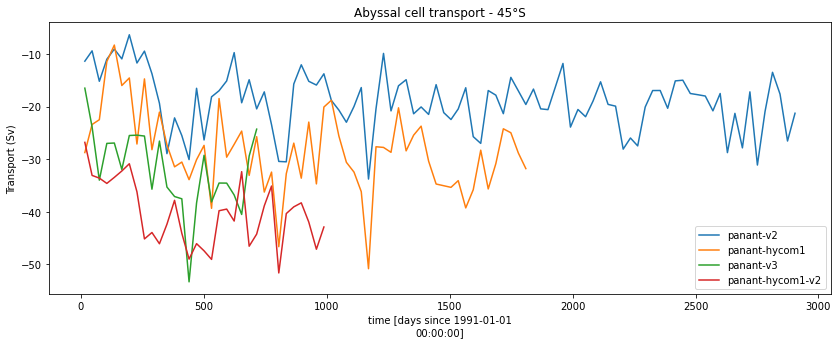

In [9]:
plt.figure(figsize=(14,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Upper cell transport - 45°S')

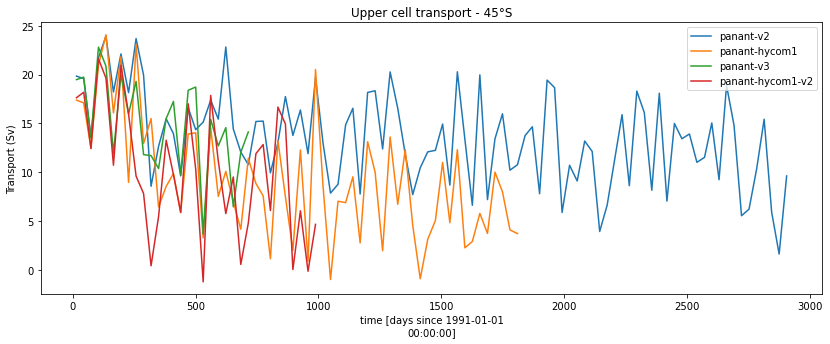

In [10]:
plt.figure(figsize=(14,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Upper cell transport - 37°S')

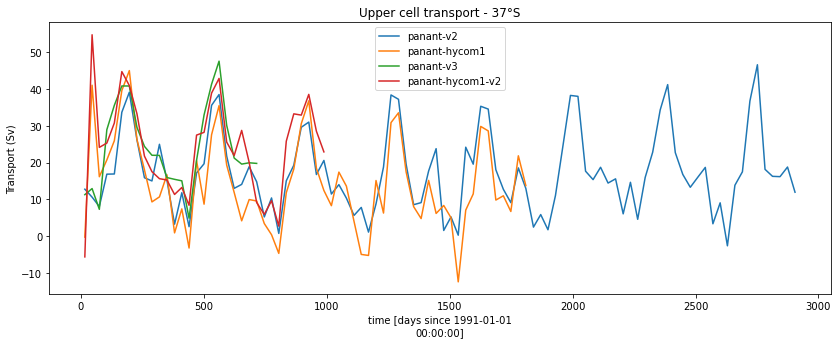

In [11]:
plt.figure(figsize=(14,5))
lat = -37
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':60},decode_times=False)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))

## Velocity profile at 45°S

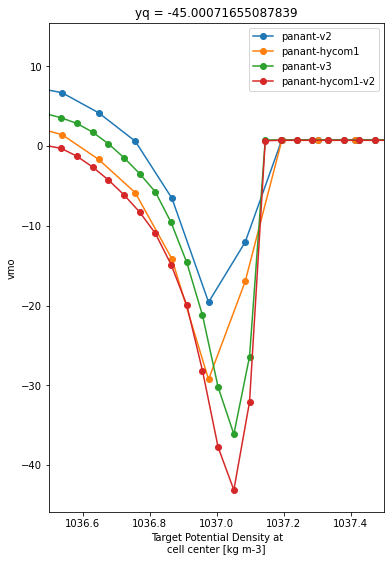

In [27]:
plt.figure(figsize=(6,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':120})
    vmo_profile45 = vmo.sel(yq=-45,method='nearest').isel(time=slice(nt-12,nt)).sum('xh').mean('time').load()/1e9
    vmo_profile45.cumsum('rho2_l').plot(marker='o',label=expt)
    plt.xlim([1036.5,1037.5])
plt.legend()

## Try at northern boundary?

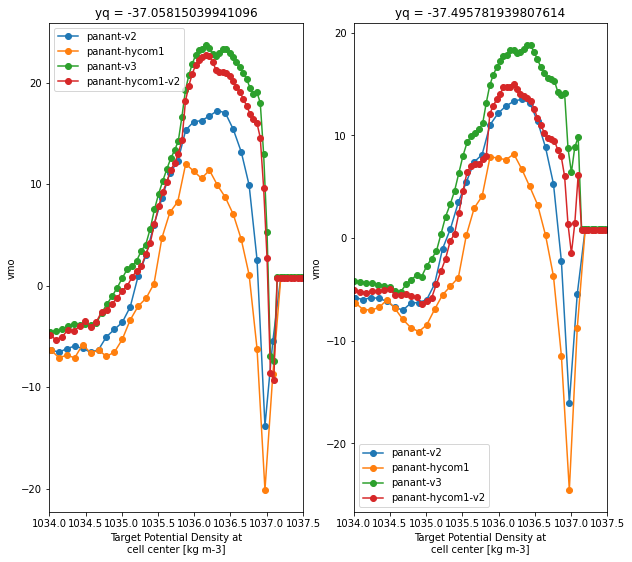

In [34]:
plt.figure(figsize=(10,9))
ii=0
plt.subplot(121)
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':120})
    vmo_profile45 = vmo.sel(yq=-37,method='nearest').isel(time=slice(nt-12,nt)).sum('xh').mean('time').load()/1e9
    vmo_profile45.cumsum('rho2_l').plot(marker='o',label=expt)
    plt.xlim([1034,1037.5])
plt.legend()


ii=0
plt.subplot(122)
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':120})
    vmo_profile45 = vmo.sel(yq=-37.5,method='nearest').isel(time=slice(nt-12,nt)).sum('xh').mean('time').load()/1e9
    vmo_profile45.cumsum('rho2_l').plot(marker='o',label=expt)
    plt.xlim([1034,1037.5])
plt.legend()